# Case Study

You are a data scientist at a top recruiting firm. Predict job salary based on different attributes to help the company more accurately/profitably determine compensation.

To start, load in the data and poke around. Try to determine the most common jobs in the data set, and use linear regression to predict the 2015 salary.


In [1]:
# Some python imports you may find useful
% matplotlib inline

from collections import defaultdict
import datetime

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [2]:
# Load the the salary data
df = pd.read_csv('../salaries.csv')

# Take a quick look
df.head()



/home/vagrant/.anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [11]:
df['JobTitle'] = df['JobTitle'].str.lower()

In [17]:
len(df['JobTitle'].value_counts().index)

1637

In [14]:
df['JobTitle'].value_counts().sort_index()

account clerk                                         351
accountant                                              5
accountant i                                            8
accountant ii                                         226
accountant iii                                        278
accountant intern                                     108
accountant iv                                         171
acpo,juvp, juv prob (sfers)                             1
acupuncturist                                           4
adm, sfgh medical center                                3
admin analyst 3                                         6
admin hearing examiner                                 31
administrative analyst                                461
administrative analyst i                                2
administrative analyst ii                               5
administrative analyst iii                              2
administrative engineer                                39
administrative

## Exploratory Analysis

Use `value_counts` to look at the distribution of job types. Pick a job type and investigate further. For example, make a histogram of salaries and compute the mean and median per year.

In [3]:
# Use .value_counts() on your data frame series and print the results

df['JobTitle'].value_counts()

# Pick a specific profession and select those rows.
# How many are there?
# Note the some jobs are specified in multiple ways
# (all upper case and mixed case).Be sure to combine
# the data appropriately.


Transit Operator                                      7036
Special Nurse                                         4389
Registered Nurse                                      3736
Public Svc Aide-Public Works                          2518
Police Officer 3                                      2421
Custodian                                             2418
TRANSIT OPERATOR                                      2388
Firefighter                                           2359
Recreation Leader                                     1971
Patient Care Assistant                                1945
Deputy Sheriff                                        1933
Police Officer                                        1476
SPECIAL NURSE                                         1402
Public Service Trainee                                1328
REGISTERED NURSE                                      1219
Police Officer 2                                      1141
Attorney (Civil/Criminal)                             11

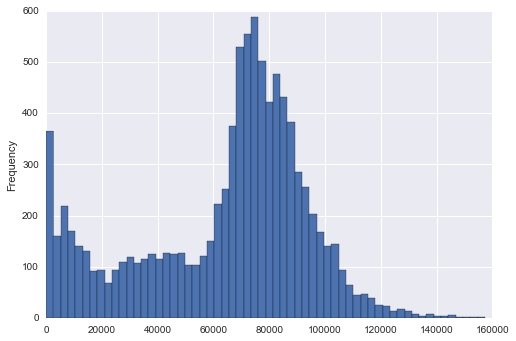

In [18]:
df[df['JobTitle'] == 'transit operator']['TotalPay'].plot.hist(bins=60)

In [20]:
df[df['JobTitle'] == 'transit operator'].groupby('Year')[['TotalPay']].mean()

,TotalPay
Year,
2011,61742.636353
2012,65524.890376
2013,67574.008684
2014,61318.264522


In [22]:
df[df['JobTitle'] == 'transit operator'].groupby('Year')[['TotalPayBenefits']].mean()

,TotalPayBenefits
Year,
2011,61742.636353
2012,95700.422458
2013,94261.816366
2014,86718.995478


In [21]:
df[df['JobTitle'] == 'transit operator'].groupby('Year')[['TotalPay']].median()

,TotalPay
Year,
2011,70132.270
2012,72073.925
2013,74863.520
2014,70946.800


In [23]:
df[df['JobTitle'] == 'transit operator'].groupby('Year')[['TotalPayBenefits']].median()

,TotalPayBenefits
Year,
2011,70132.270
2012,107864.965
2013,107021.020
2014,103325.380


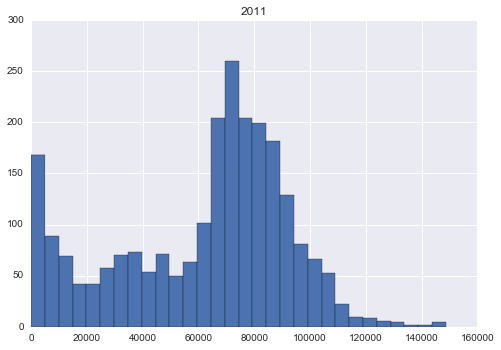

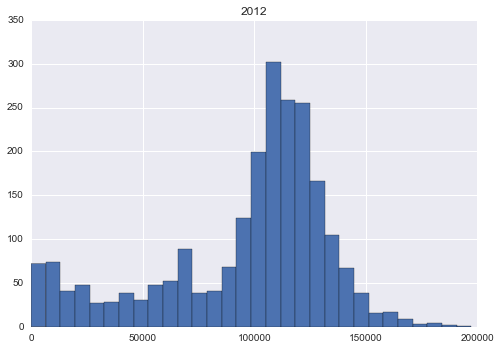

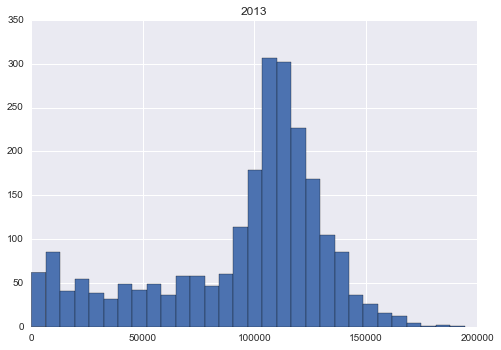

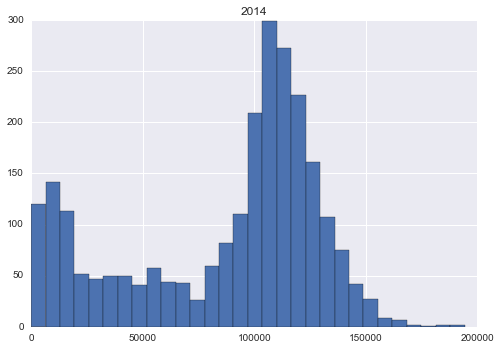

In [28]:
# Make a histogram of salaries for your chosen job -- one for each year
df_transit_op_yr = df[df['JobTitle'] == 'transit operator'].groupby('Year')


for name, group in df_transit_op_yr :
    fig, ax = plt.subplots()
    ax.hist(group['TotalPayBenefits'], bins=30)
    ax.set_title(name)
    plt.show()

## Fit a model and Visualize

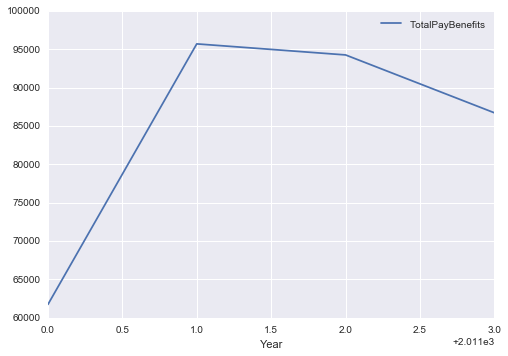

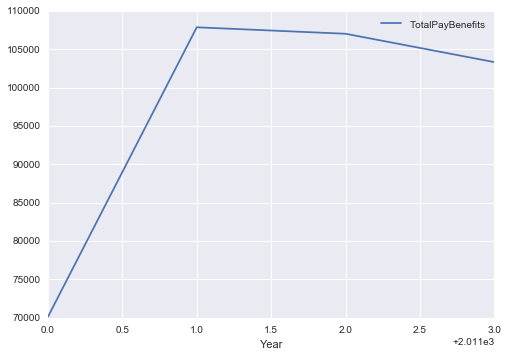

In [32]:
# Look at change over time, mean and median per year
#df_transit_op = df[df['JobTitle'] == 'transit operator']

# Plot the mean and median versus year with `plt`
fig, ax = plt.subplots()
ax.scatter(
    
df[df['JobTitle'] == 'transit operator'].groupby('Year')[['TotalPayBenefits']].mean().plot()
df[df['JobTitle'] == 'transit operator'].groupby('Year')[['TotalPayBenefits']].median().plot()

#df_transit_op['TotalPayBenefits']
#df_transit_op.groupby('Year')[['TotalPayBenefits']]

In [41]:
# Fit a linear model
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split


df_temp = df[df['JobTitle'] == 'transit operator'].groupby('Year')[['TotalPayBenefits']].mean()

# Make a prediction for the 2015 Salary with your model
lm = linear_model.LinearRegression()

model = lm.fit(pd.DataFrame(df_temp.index), df_temp['TotalPayBenefits'])
predictions = model.predict(X)


# Plot the data, the best fit line, and the prediction



In [38]:
df_temp['TotalPayBenefits']

Year
2011    61742.636353
2012    95700.422458
2013    94261.816366
2014    86718.995478
Name: TotalPayBenefits, dtype: float64